In [1]:
import torch
from kymatio import Scattering1D
import librosa
import IPython.display as ipd

In [2]:
def get_scattering(x, J=6, Q=8):
    x = torch.from_numpy(x).float()
    x /= x.abs().max()
    x = x.view(1, -1)

    T = x.shape[-1]
    J = 6
    Q = 16

    meta = Scattering1D.compute_meta_scattering(J, Q)
    order0 = (meta['order'] == 0)
    order1 = (meta['order'] == 1)
    order2 = (meta['order'] == 2)

    scattering = Scattering1D(J, T, Q)
    Sx = scattering.forward(x)
    
    return Sx, Sx[0,order0,:].numpy(), Sx[0,order1,:].numpy(), Sx[0,order2,:].numpy()

In [3]:
vib_all, _ = librosa.load('../MIS/Flute.vib.mf.C5B5.aiff', sr=44100)
vib = vib_all[:138822]
ipd.display(ipd.Audio(vib, rate=44100))

nonvib_all, _ = librosa.load('../MIS/Flute.nonvib.mf.C5B5.aiff', sr=44100)
nonvib = nonvib_all[:138822]
ipd.display(ipd.Audio(nonvib, rate=44100))

viv_non = np.concatenate((vib, array2D_2))

In [4]:
_, Svib0, Svib1, Svib2 = get_scattering(vib)
_, Snonvib0, Snonvib1, Snonvib2 = get_scattering(nonvib)

Mvib = librosa.feature.melspectrogram(vib, sr=44100)
Mnonvib = librosa.feature.melspectrogram(nonvib, sr=44100)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


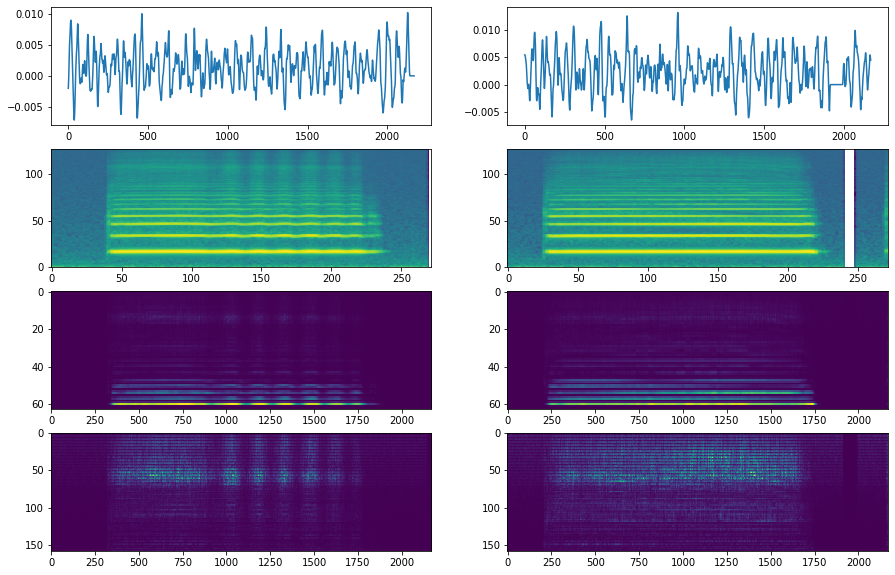

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(4,2, figsize=(15,10))

ax[0,0].plot(Svib0.ravel())
ax[0,1].plot(Snonvib0.ravel())
ax[1,0].imshow(np.log(Mvib), origin='lower', aspect='auto')
ax[1,1].imshow(np.log(Mnonvib), origin='lower', aspect='auto')
ax[2,0].imshow(Svib1, aspect='auto')
ax[2,1].imshow(Snonvib1, aspect='auto')
ax[3,0].imshow(Svib2, aspect='auto')
ax[3,1].imshow(Snonvib2, aspect='auto')

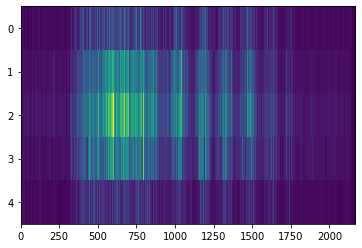

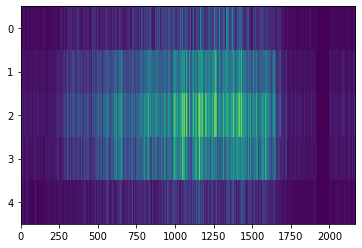

In [19]:
plt.imshow(Svib2[39:44,:], aspect='auto')
plt.show()
plt.imshow(Snonvib2[39:44,:], aspect='auto')